In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.mlab as mlab

In [4]:
dfraw = pd.read_csv('features.csv', sep=',')
dfraw

,article,offset,alias,entity,link_score,entity_score,entity_score_rank,entity_score_dtop,entity_score_dsuc,cosine_sim,cosine_sim_rank,cosine_sim_dtop,cosine_sim_dsuc,correct
0,Albert Wenk,174,Artesis Hogeschool Antwerpen,Artesis Hogeschool Antwerpen,1.000000,1.000000,1,Infinity,Infinity,0.027930,1,Infinity,Infinity,True
1,Logan Ramsey,1408,Anne Ramsey,Anne Ramsey,1.000000,1.000000,1,Infinity,0.44082840236686394,0.266522,1,Infinity,1.2665216650036508,True
2,Spektralmethode,171,Ansatzfunktionen,Ansatz (Mathematik),1.000000,0.333333,2,0.3333333333333333,Infinity,0.181334,2,0.06183150029798601,Infinity,False
3,Spektralmethode,171,Ansatzfunktionen,Ansatzfunktion,1.000000,0.666667,1,Infinity,0.3333333333333333,0.243165,1,Infinity,0.06183150029798601,True
4,Élencourt,138,Arrondissement Beauvais,Arrondissement Beauvais,1.000000,1.000000,1,Infinity,Infinity,0.301277,1,Infinity,Infinity,True
5,Victor Eftimiu,74,Albanien,Abgeordneter,0.690233,0.000310,21,0.8176178660049628,Infinity,0.021549,25,0.062188452380636604,7.688920440697689E-4,False
6,Victor Eftimiu,74,Albanien,Adel,0.690233,0.000620,14,0.8173076923076923,3.1017369727047146E-4,0.042905,8,0.040833356179805165,8.115629768289251E-4,False
7,Victor Eftimiu,74,Albanien,Albania,0.690233,0.000310,21,0.8176178660049628,Infinity,0.021708,24,0.062029720876732426,1.5873150390417756E-4,False
8,Victor Eftimiu,74,Albanien,Albania (Begriffsklärung),0.690233,0.000310,21,0.8176178660049628,Infinity,0.010401,52,0.07333645051479792,2.3759949270757072E-4,False
9,Victor Eftimiu,74,Albanien,Albanien,0.690233,0.817928,1,Infinity,0.7127791563275434,0.042093,9,0.04164491915663409,0.006297353533244558,True


In [4]:
columns = ["entity_score_dtop", "entity_score_dsuc", "cosine_sim_dtop", "cosine_sim_dsuc"]
dfraw[columns] = dfraw[columns].astype(float)
inf_replacement = -0.04
df = dfraw.applymap(lambda val: inf_replacement if val == float("inf") else val)
df

,article,offset,alias,entity,link_score,entity_score,entity_score_rank,entity_score_dtop,entity_score_dsuc,cosine_sim,cosine_sim_rank,cosine_sim_dtop,cosine_sim_dsuc,correct
0,Albert Wenk,174,Artesis Hogeschool Antwerpen,Artesis Hogeschool Antwerpen,1.000000,1.000000,1,-0.040000,-0.040000,0.027930,1,-0.040000,-0.040000,True
1,Logan Ramsey,1408,Anne Ramsey,Anne Ramsey,1.000000,1.000000,1,-0.040000,0.440828,0.266522,1,-0.040000,1.266522,True
2,Spektralmethode,171,Ansatzfunktionen,Ansatz (Mathematik),1.000000,0.333333,2,0.333333,-0.040000,0.181334,2,0.061832,-0.040000,False
3,Spektralmethode,171,Ansatzfunktionen,Ansatzfunktion,1.000000,0.666667,1,-0.040000,0.333333,0.243165,1,-0.040000,0.061832,True
4,Élencourt,138,Arrondissement Beauvais,Arrondissement Beauvais,1.000000,1.000000,1,-0.040000,-0.040000,0.301277,1,-0.040000,-0.040000,True
5,Victor Eftimiu,74,Albanien,Abgeordneter,0.690233,0.000310,21,0.817618,-0.040000,0.021549,25,0.062188,0.000769,False
6,Victor Eftimiu,74,Albanien,Adel,0.690233,0.000620,14,0.817308,0.000310,0.042905,8,0.040833,0.000812,False
7,Victor Eftimiu,74,Albanien,Albania,0.690233,0.000310,21,0.817618,-0.040000,0.021708,24,0.062030,0.000159,False
8,Victor Eftimiu,74,Albanien,Albania (Begriffsklärung),0.690233,0.000310,21,0.817618,-0.040000,0.010401,52,0.073336,0.000238,False
9,Victor Eftimiu,74,Albanien,Albanien,0.690233,0.817928,1,-0.040000,0.712779,0.042093,9,0.041645,0.006297,True


In [23]:
p_label = "Valid links"
n_label = "Invalid links"
p_color = "green"
n_color = "blue"
p_alpha = 0.8
n_alpha = 0.5

relative_frequency = r"$f$"
ls = "$ls$"
es = "$es$"
cs = "$cs$"
rank = r"$r$"
dtop = r"$\Delta top$"
dsuc = r"$\Delta succ$"
es_index = r"$_{es}$"
cs_index = r"$_{cs}$"
es_rank = rank + es_index
es_dtop = dtop + es_index
es_dsuc = dsuc + es_index
cs_rank = rank + cs_index
cs_dtop = dtop + cs_index
cs_dsuc = dsuc + cs_index

# https://stackoverflow.com/questions/12444716/how-do-i-set-the-figure-title-and-axes-labels-font-size-in-matplotlib
params = {'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large'}
plt.rcParams.update(params)

In [6]:
x = df[["correct"]].as_matrix()
links = len(list(filter(lambda val: val, x)))
no_links = len(list(filter(lambda val: not val, x)))
(links, no_links)

(8357, 91643)

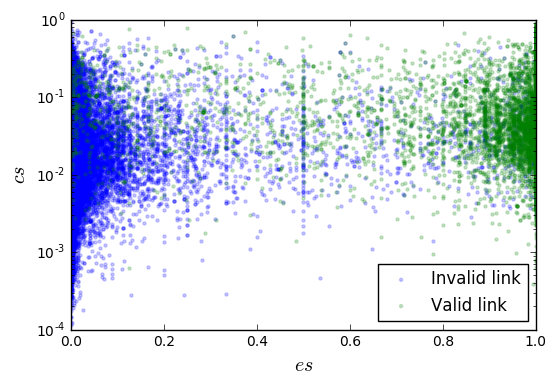

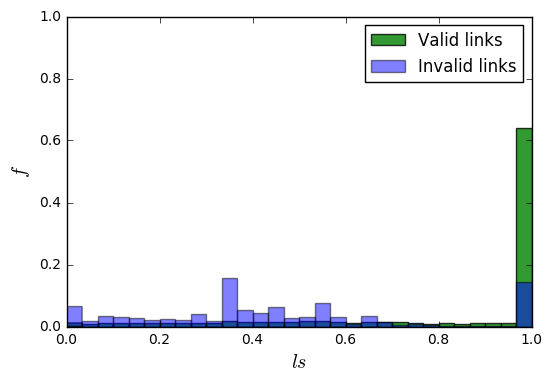

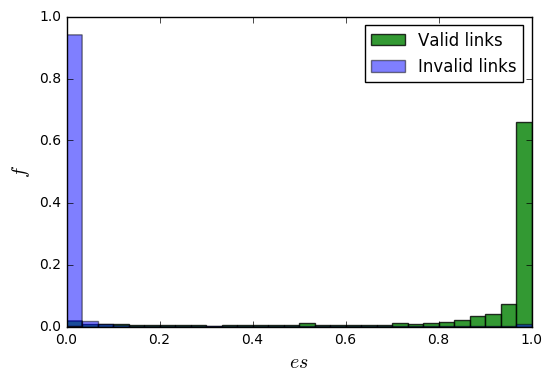

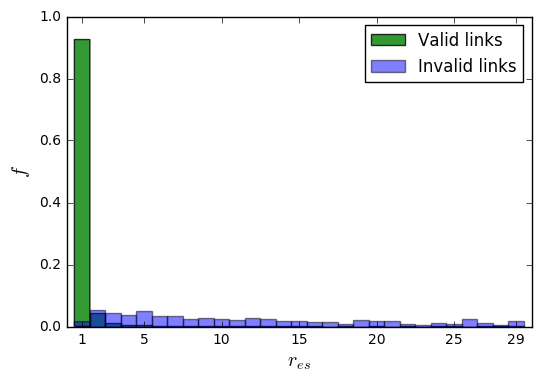

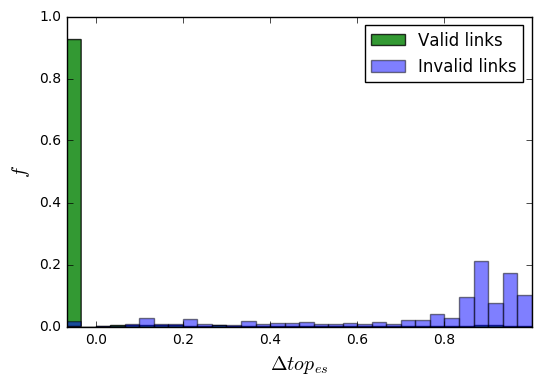

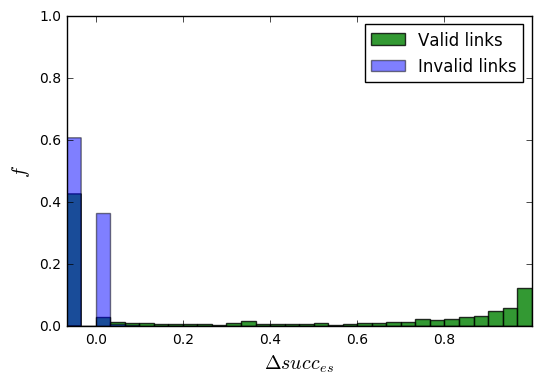

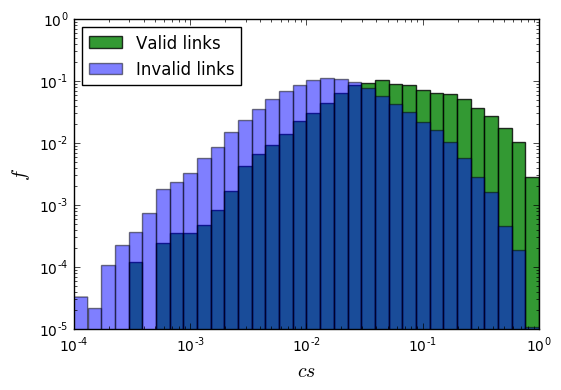

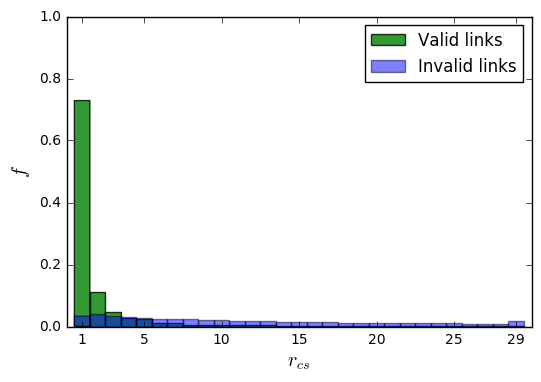

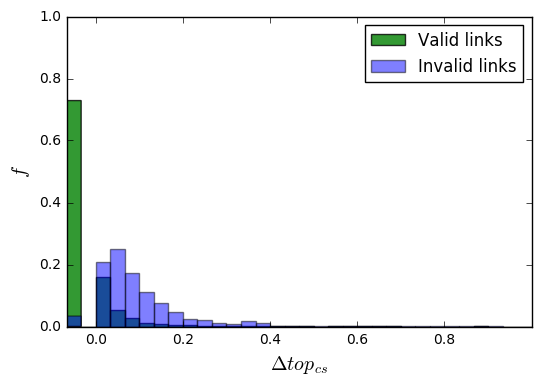

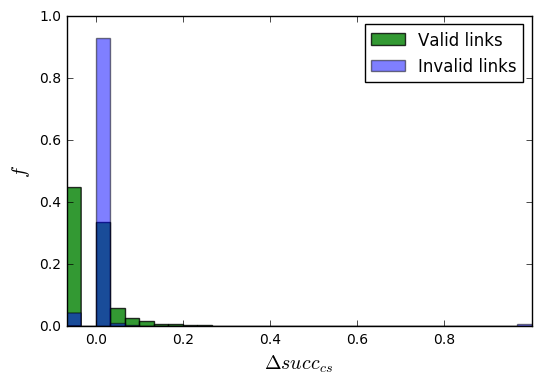

'done'

In [28]:
composite_features()
link_scores()
entity_scores()
entity_score_ranks()
entity_score_dtop()
entity_score_dsuc()
cosine_sims()
cosine_sim_ranks()
cosine_sim_dtop()
cosine_sim_dsuc()
"done"

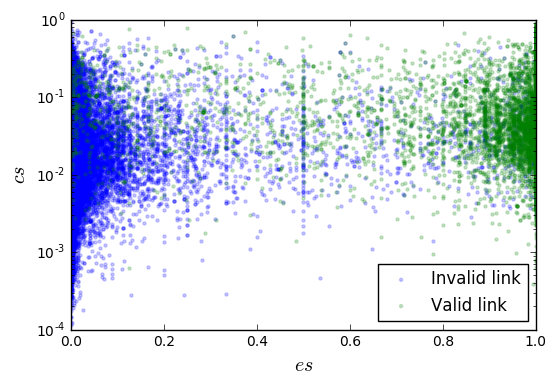

'done'

In [8]:
def composite_features():
    data = df[['entity_score', 'cosine_sim', 'correct']]

    labels = df.correct

    X = data.as_matrix()
    y = labels.as_matrix()

    class_names = ['Invalid link', 'Valid link']

    fig, axes = plt.subplots()
    colors = [n_color, p_color]
    for color, i, class_name in zip(colors, [0, 1, 2], class_names):
        plt.scatter(X[y == i, 0], X[y == i, 1], color=color, alpha=0.2, label=class_name, marker=".")

    axes.set_xlim([0.0, 1.0])
    axes.set_ylim([0.0001, 1.0])
    axes.set_yscale('log')

    #plt.title('Composite features')
    plt.xlabel(es)
    plt.ylabel(cs)
    plt.legend(loc='lower right', shadow=False, scatterpoints=1)
    plt.show()
    fig.savefig("plots/composite_features.png", bbox_inches="tight", dpi=600)
    
composite_features()
"done"

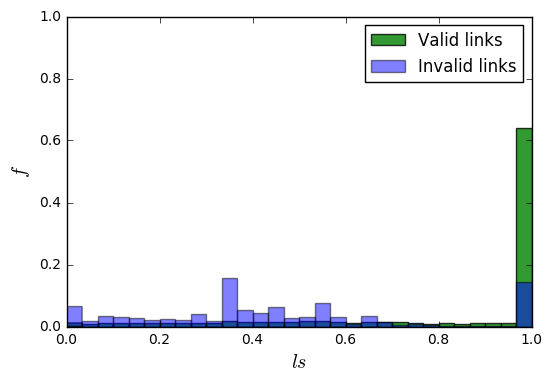

In [13]:
def link_scores(logx = False):
    data = df[['link_score', 'correct']]
    x = data.as_matrix()
    tp = list(filter(lambda val: val[1] == True, x))
    tn = list(filter(lambda val: val[1] == False, x))
    tp = pd.Series(list(map(lambda pair: pair[0], tp)))
    tn = pd.Series(list(map(lambda pair: pair[0], tn)))

    # create bin boundaries
    number_bins = 30
    bins = np.arange(0.0, 1.0, 1.0 / number_bins)
    bins = np.append(bins, 1.0)
    if logx:
        bins = np.logspace(-1, 0, number_bins)

    # normalize histogram: show relative frequencies of classes
    p_weights = np.ones_like(tp)/float(len(tp))
    n_weights = np.ones_like(tn)/float(len(tn))

    fig, ax = plt.subplots()
    ax.hist(tp, weights=p_weights, bins=bins, alpha=p_alpha, label="Valid links", color=p_color)
    ax.hist(tn, weights=n_weights, bins=bins, alpha=n_alpha, label="Invalid links", color=n_color)
    
    if logx:
        ax.set_xlim([0.1, 1.0])
        ax.set_xscale('log')
    ax.set_ylim([0.0, 1.0])

    #plt.title('Distribution of link scores')
    plt.xlabel(ls)
    plt.ylabel(relative_frequency)
    plt.legend(loc='best')
    plt.show()
    fig.savefig("plots/link_scores.pdf", bbox_inches="tight")
    
link_scores(False)

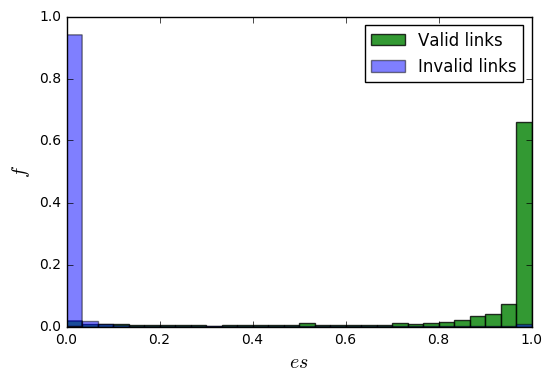

In [14]:
def entity_scores(normalize=True):
    # https://stackoverflow.com/questions/6871201/plot-two-histograms-at-the-same-time-with-matplotlib

    data = df[['entity_score', 'correct']]
    x = data.as_matrix()
    tp = list(filter(lambda val: val[1] == True, x))
    tn = list(filter(lambda val: val[1] == False, x))
    tp = pd.Series(list(map(lambda pair: pair[0], tp)))
    tn = pd.Series(list(map(lambda pair: pair[0], tn)))

    # create bin boundaries
    number_bins = 30
    bins = np.arange(0.0, 1.0, 1.0 / number_bins)
    bins = np.append(bins, 1.0)

    # normalize histogram: show relative frequencies of classes
    if normalize:
        p_weights = np.ones_like(tp)/float(len(tp))
        n_weights = np.ones_like(tn)/float(len(tn))
    else:
        p_weights = [1] * len(tp)
        n_weights = [1] * len(tn)
        
    fig, ax = plt.subplots()
    ax.hist(tp, weights=p_weights, bins=bins, alpha=p_alpha, label=p_label, color=p_color)
    ax.hist(tn, weights=n_weights, bins=bins, alpha=n_alpha, label=n_label, color=n_color)
    if normalize:
        ax.set_ylim([0.0, 1.0])
    else:
        ax.set_yscale("log")

    #plt.title('Distribution of entity scores')
    plt.xlabel(es)
    plt.ylabel(relative_frequency)
    plt.legend(loc='best')
    plt.show()
    fig.savefig("plots/entity_scores.pdf", bbox_inches="tight")
    
entity_scores(True)

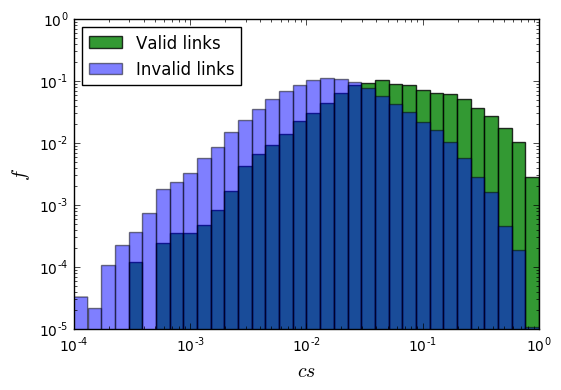

In [27]:
def cosine_sims(logx=True, logy=True):
    data = df[['cosine_sim', 'correct']]
    x = data.as_matrix()
    tp = list(filter(lambda val: val[1] == True, x))
    tn = list(filter(lambda val: val[1] == False, x))
    tp = pd.Series(list(map(lambda pair: pair[0], tp)))
    tn = pd.Series(list(map(lambda pair: pair[0], tn)))

    # create bin boundaries
    number_bins = 35
    bins = np.arange(0.0, 1.0, 1.0 / number_bins)
    bins = np.append(bins, 1.0)
    if logx:
        bins = np.logspace(-4, 0, number_bins)

    # normalize histogram: show relative frequencies of classes
    p_weights = np.ones_like(tp)/float(len(tp))
    n_weights = np.ones_like(tn)/float(len(tn))

    fig, ax = plt.subplots()
    ax.hist(tp, weights=p_weights, bins=bins, alpha=p_alpha, label=p_label, color=p_color)
    ax.hist(tn, weights=n_weights, bins=bins, alpha=n_alpha, label=n_label, color=n_color)
    if logx:
        ax.set_xlim([0.0001, 1.0])
        ax.set_xscale('log')
    if logy:
        ax.set_ylim([0.00001, 1.0])
        ax.set_yscale('log')
    else:
        ax.set_ylim([0.0, 1.0])

    #plt.title('Distribution of context scores')
    plt.xlabel(cs)
    plt.ylabel(relative_frequency)
    plt.legend(loc='best')
    plt.show()
    fig.savefig("plots/context_scores.pdf", bbox_inches="tight")
    
cosine_sims(True, True)

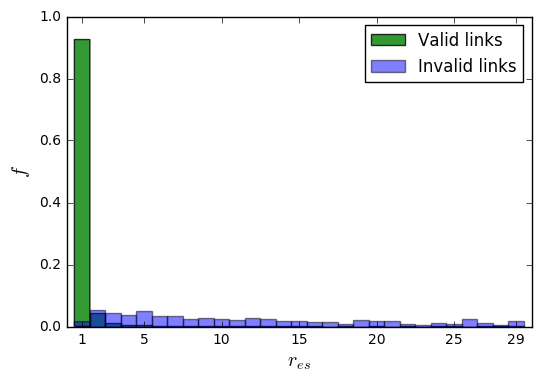

In [16]:
def entity_score_ranks():
    data = df[['entity_score_rank', 'correct']]
    x = data.as_matrix()
    tp = list(filter(lambda val: val[1] == True, x))
    tn = list(filter(lambda val: val[1] == False, x))
    tp = pd.Series(list(map(lambda pair: pair[0], tp)))
    tn = pd.Series(list(map(lambda pair: pair[0], tn)))

    # create bin boundaries
    number_bins = 29
    bins = list(range(1, number_bins + 2))

    # normalize histogram: show relative frequencies of classes
    p_weights = np.ones_like(tp)/float(len(tp))
    n_weights = np.ones_like(tn)/float(len(tn))

    fig, ax = plt.subplots()
    ax.hist(tp, weights=p_weights, bins=bins, alpha=p_alpha, label=p_label, align="left", color=p_color)
    ax.hist(tn, weights=n_weights, bins=bins, alpha=n_alpha, label=n_label, align="left", color=n_color)

    ticks = [1] + list(range(0, max(bins), 5))[1:] + [bins[-2]]
    ax.set_xticks(ticks)
    ax.set_ylim([0.0, 1.0])

    #plt.title("Distribution of entity scores' ranks")
    plt.xlabel(es_rank)
    plt.ylabel(relative_frequency)
    plt.legend(loc='upper right')
    plt.show()
    fig.savefig("plots/entity_scores_ranks.pdf", bbox_inches="tight")
    
entity_score_ranks()

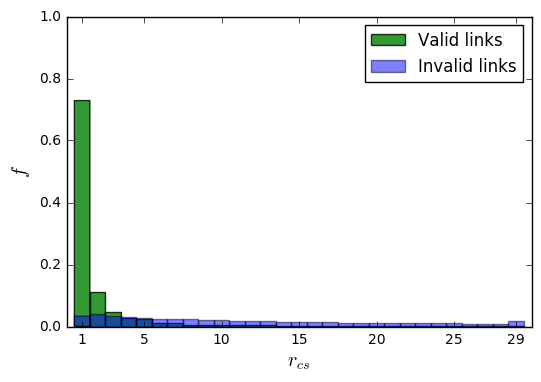

In [17]:
def cosine_sim_ranks():
    data = df[['cosine_sim_rank', 'correct']]
    x = data.as_matrix()
    tp = list(filter(lambda val: val[1] == True, x))
    tn = list(filter(lambda val: val[1] == False, x))
    tp = pd.Series(list(map(lambda pair: pair[0], tp)))
    tn = pd.Series(list(map(lambda pair: pair[0], tn)))

    # create bin boundaries
    number_bins = 29
    bins = list(range(1, number_bins + 2))

    # normalize histogram: show relative frequencies of classes
    p_weights = np.ones_like(tp)/float(len(tp))
    n_weights = np.ones_like(tn)/float(len(tn))

    fig, ax = plt.subplots()
    ax.hist(tp, weights=p_weights, bins=bins, alpha=p_alpha, label=p_label, align="left", color=p_color)
    ax.hist(tn, weights=n_weights, bins=bins, alpha=n_alpha, label=n_label, align="left", color=n_color)

    ticks = [1] + list(range(0, max(bins), 5))[1:] + [bins[-2]]
    ax.set_xticks(ticks)
    ax.set_ylim([0.0, 1.0])

    #plt.title("Distribution of context scores' ranks")
    plt.xlabel(cs_rank)
    plt.ylabel(relative_frequency)
    plt.legend(loc='upper right')
    plt.show()
    fig.savefig("plots/context_scores_ranks.pdf", bbox_inches="tight")
    
cosine_sim_ranks()

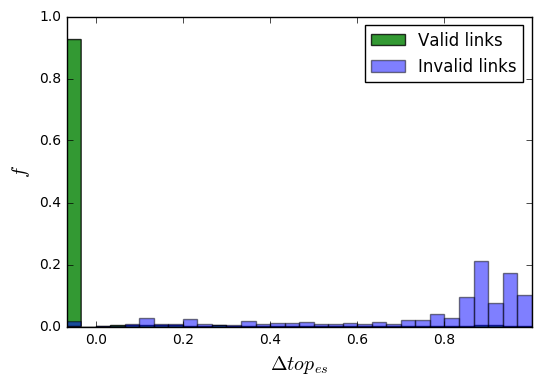

In [18]:
def entity_score_dtop():
    data = df[['entity_score_dtop', 'correct']]
    x = data.as_matrix()
    tp = list(filter(lambda val: val[1] == True, x))
    tn = list(filter(lambda val: val[1] == False, x))
    tp = pd.Series(list(map(lambda pair: pair[0], tp)))
    tn = pd.Series(list(map(lambda pair: pair[0], tn)))

    # create bin boundaries
    number_bins = 30
    bin_start, bin_end = 0.0, 1.0
    bin_width = (bin_end - bin_start) / number_bins
    bins = np.arange(bin_start, bin_end, bin_width)
    bins = np.append(bins, 1.0)
    space = 2
    bins = np.append([bin_start - space * bin_width, bin_start - bin_width], bins)

    # normalize histogram: show relative frequencies of classes
    p_weights = np.ones_like(tp)/float(len(tp))
    n_weights = np.ones_like(tn)/float(len(tn))

    fig, ax = plt.subplots()
    ax.hist(tp, weights=p_weights, bins=bins, alpha=p_alpha, label=p_label, color=p_color)
    ax.hist(tn, weights=n_weights, bins=bins, alpha=n_alpha, label=n_label, color=n_color)

    #ticks = [-space * bin_width] + list(np.arange(0.0, 1.0, 0.2))
    #tick_labels = list(ticks)
    #tick_labels[0] = "n/a"
    #ax.set_xticks(ticks)
    #ax.set_xticklabels(tick_labels)
    ax.set_xlim(-space * bin_width, 1.0)
    ax.set_ylim([0.0, 1.0])

    #plt.title(r"Distribution of entity scores' " + dtop)
    plt.xlabel(es_dtop)
    plt.ylabel(relative_frequency)
    plt.legend(loc='best')
    plt.show()
    fig.savefig("plots/entity_scores_dtop.pdf", bbox_inches="tight")
    
entity_score_dtop()

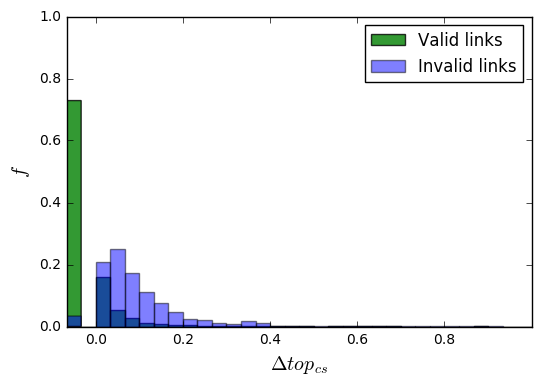

In [19]:
def cosine_sim_dtop():
    data = df[['cosine_sim_dtop', 'correct']]
    x = data.as_matrix()
    tp = list(filter(lambda val: val[1] == True, x))
    tn = list(filter(lambda val: val[1] == False, x))
    tp = pd.Series(list(map(lambda pair: pair[0], tp)))
    tn = pd.Series(list(map(lambda pair: pair[0], tn)))

    # create bin boundaries
    number_bins = 30
    bin_start, bin_end = 0.0, 1.0
    bin_width = (bin_end - bin_start) / number_bins
    bins = np.arange(bin_start, bin_end, bin_width)
    bins = np.append(bins, 1.0)
    bins = np.append([bin_start - 2 * bin_width, bin_start - bin_width], bins)

    # normalize histogram: show relative frequencies of classes
    p_weights = np.ones_like(tp)/float(len(tp))
    n_weights = np.ones_like(tn)/float(len(tn))

    fig, ax = plt.subplots()
    ax.hist(tp, weights=p_weights, bins=bins, alpha=p_alpha, label=p_label, color=p_color)
    ax.hist(tn, weights=n_weights, bins=bins, alpha=n_alpha, label=n_label, color=n_color)

    #ticks = [1] + list(range(0, max(bins), 5))[1:] + [bins[-2]]
    #ax.set_xticks(ticks)
    ax.set_xlim(-2 * bin_width, 1.0)
    ax.set_ylim([0.0, 1.0])

    #plt.title(r"Distribution of context scores' " + dtop)
    plt.xlabel(cs_dtop)
    plt.ylabel(relative_frequency)
    plt.legend(loc='best')
    plt.show()
    fig.savefig("plots/context_scores_dtop.pdf", bbox_inches="tight")
    
cosine_sim_dtop()

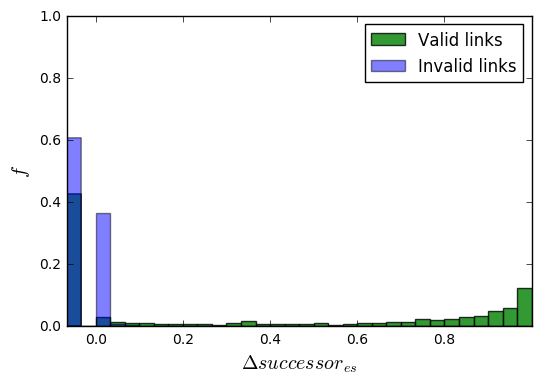

In [20]:
def entity_score_dsuc():
    data = df[['entity_score_dsuc', 'correct']]
    x = data.as_matrix()
    tp = list(filter(lambda val: val[1] == True, x))
    tn = list(filter(lambda val: val[1] == False, x))
    tp = pd.Series(list(map(lambda pair: pair[0], tp)))
    tn = pd.Series(list(map(lambda pair: pair[0], tn)))

    # create bin boundaries
    number_bins = 30
    bin_start, bin_end = 0.0, 1.0
    bin_width = (bin_end - bin_start) / number_bins
    bins = np.arange(bin_start, bin_end, bin_width)
    bins = np.append(bins, 1.0)
    bins = np.append([bin_start - 2 * bin_width, bin_start - bin_width], bins)

    # normalize histogram: show relative frequencies of classes
    p_weights = np.ones_like(tp)/float(len(tp))
    n_weights = np.ones_like(tn)/float(len(tn))

    fig, ax = plt.subplots()
    ax.hist(tp, weights=p_weights, bins=bins, alpha=p_alpha, label=p_label, color=p_color)
    ax.hist(tn, weights=n_weights, bins=bins, alpha=n_alpha, label=n_label, color=n_color)

    #ticks = [1] + list(range(0, max(bins), 5))[1:] + [bins[-2]]
    #ax.set_xticks(ticks)
    ax.set_xlim(-2 * bin_width, 1.0)
    ax.set_ylim([0.0, 1.0])

    #plt.title(r"Distribution of entity scores' " + dsuc)
    plt.xlabel(es_dsuc)
    plt.ylabel(relative_frequency)
    plt.legend(loc='best')
    plt.show()
    fig.savefig("plots/entity_scores_dsuc.pdf", bbox_inches="tight")
    
entity_score_dsuc()

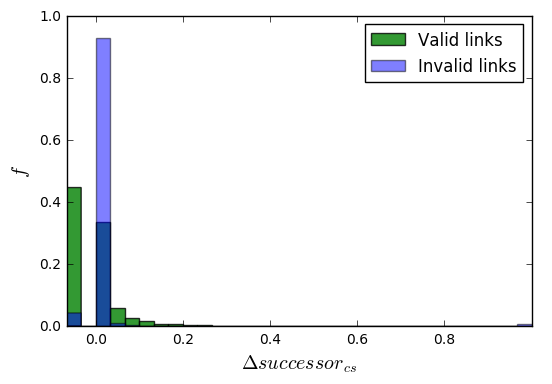

In [21]:
def cosine_sim_dsuc():
    data = df[['cosine_sim_dsuc', 'correct']]
    x = data.as_matrix()
    tp = list(filter(lambda val: val[1] == True, x))
    tn = list(filter(lambda val: val[1] == False, x))
    tp = pd.Series(list(map(lambda pair: pair[0], tp)))
    tn = pd.Series(list(map(lambda pair: pair[0], tn)))

    # create bin boundaries
    number_bins = 30
    bin_start, bin_end = 0.0, 1.0
    bin_width = (bin_end - bin_start) / number_bins
    bins = np.arange(bin_start, bin_end, bin_width)
    bins = np.append(bins, 1.0)
    bins = np.append([bin_start - 2 * bin_width, bin_start - bin_width], bins)

    # normalize histogram: show relative frequencies of classes
    p_weights = np.ones_like(tp)/float(len(tp))
    n_weights = np.ones_like(tn)/float(len(tn))

    fig, ax = plt.subplots()
    ax.hist(tp, weights=p_weights, bins=bins, alpha=p_alpha, label=p_label, color=p_color)
    ax.hist(tn, weights=n_weights, bins=bins, alpha=n_alpha, label=n_label, color=n_color)

    #ticks = [1] + list(range(0, max(bins), 5))[1:] + [bins[-2]]
    #ax.set_xticks(ticks)
    ax.set_xlim(-2 * bin_width, 1.0)
    ax.set_ylim([0.0, 1.0])
    
    #plt.title(r"Distribution of context scores' " + dsuc)
    plt.xlabel(cs_dsuc)
    plt.ylabel(relative_frequency)
    plt.legend(loc='best')
    plt.show()
    fig.savefig("plots/context_scores_dsuc.pdf", bbox_inches="tight")
    
cosine_sim_dsuc()